In [100]:
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import measure
import random
%config InlineBackend.figure_format ='retina'

In [122]:
def show_contours(dmap, i=True):
    contours = measure.find_contours(dmap, 0.)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    if i:
        plt.imshow(dmap, cmap='RdBu')
    for i, contour in enumerate(contours):
        m=1
        if i:
            m=-1
        plt.plot(contour[:, 1], m*contour[:, 0], linewidth=2, c='k')

In [11]:
def get_dmap(sdf, num=65, domain=(8.,8.)):
    n = num
    m = np.empty((n,n))
    a = float(domain[0])
    b = float(domain[1])
    for x in range(n):
        for y in range(n):
            cx = -a/2 + (x/float(n))*a
            cy = -b/2 + (y/float(n))*b
            #d = max(abs(cx) - a/2, abs(cy) - b/2)
            d = sdf(cx,cy)
            m[y,x] = d
    return m

In [18]:
def show_dmap(dmap, cmap = 'RdBu'):
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(dmap, cmap=cmap)

# PhD course
## Volumetric Modelling


Digital Building Technologies DBT<br>
[dbt.arch.ethz.ch](http://dbt.arch.ethz.ch)

Mathias Bernhard<br>
[bernhard@arch.ethz.ch](mailto:bernhard@arch.ethz.ch)

# Boundary Representation

list of vertices for a rectangle with sides `a` and `b`
<pre>
v -a/2 -b/2 
v  a/2 -b/2
v  a/2  b/2
v -a/2  b/2
</pre>

list of lines / edges connecting the vertices
<pre>
l 0 l
l 1 2
l 2 3
l 3 0
</pre>

rectangular face created from the 4 points
<pre>f 0 1 2 3</pre>

(-4.0, 4.0, -4.0, 4.0)

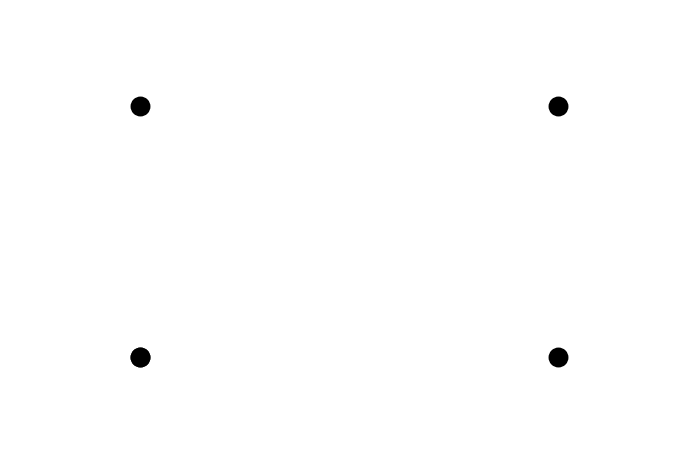

In [79]:
a, b = 5., 3.
v = [[-a/2,-b/2], [a/2,-b/2], [a/2,b/2], [-a/2,b/2], [-a/2,-b/2]]
vx = [c[0] for c in v]
vy = [c[1] for c in v]
plt.scatter(vx,vy, s=80, c='k')
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

(-4.0, 4.0, -4.0, 4.0)

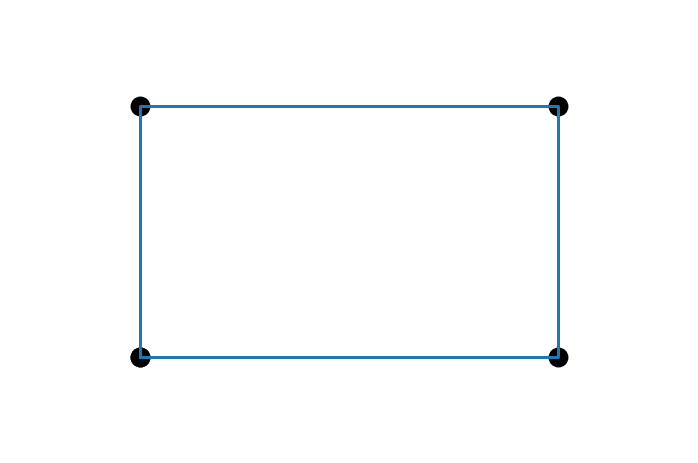

In [80]:
plt.scatter(vx,vy, s=80, c='k')
plt.plot(vx,vy)
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

# Part Modelling

<img src='images/part/sketch.png'></img>

<img src='images/part/surfaces.png'></img>

<img src='images/part/assembly.png'></img>

<img src='images/part/tree.png'></img>

# Function Representation

## Rectangle

$f(x,y) = max(abs(x) - \frac{a}{2}, abs(y) - \frac{b}{2})$

```python
f(x,y) = max(abs(x) - a/2, abs(y) - b/2)
```

In [131]:
n = 65
mr = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = -4 + (x/float(n))*8
        cy = -4 + (y/float(n))*8
        d = max(abs(cx) - a/2, abs(cy) - b/2)
        mr[y,x] = d

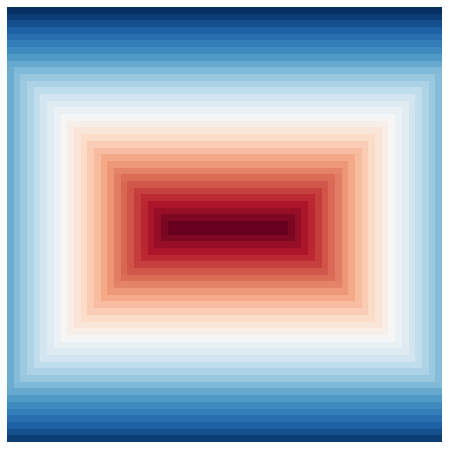

In [96]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mr, cmap='RdBu')

## sample space at discrete intervals

In [7]:
ra = 5.0
rb = 3.0

In [6]:
def sdf(x,y):
    return max(abs(x) - ra/2, abs(y) - rb/2)

In [21]:
mr = get_dmap(sdf)

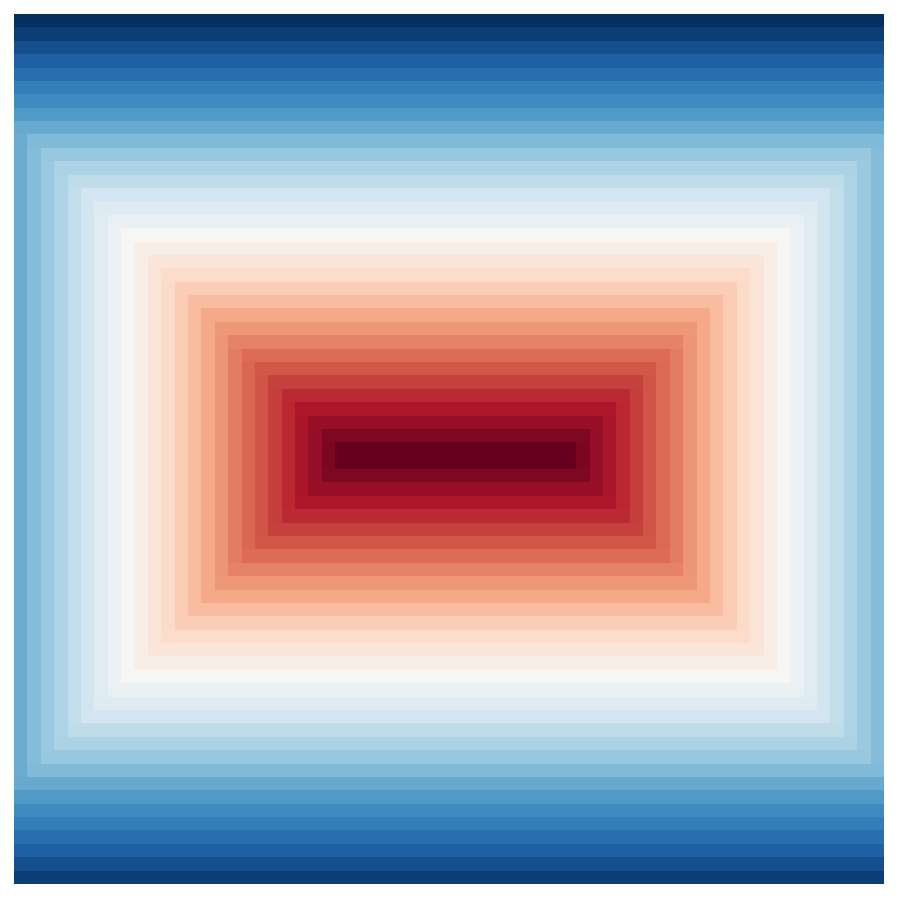

In [81]:
show_dmap(mr)

## boundary is where $f(x,y)=0$

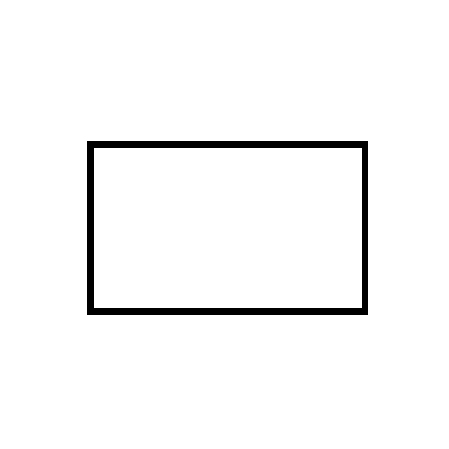

In [103]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mr)<0.07,cmap='Greys')

### Circle:
$f(x,y) = \sqrt{x^2 + y^2} - r$

In [98]:
mc = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = -4 + (x/float(n))*8
        cy = -4 + (y/float(n))*8
        d = math.sqrt(cx**2 + cy**2) - 2.2
        mc[y,x] = d

In [15]:
crad = 2.2
def csdf(x,y):
    return math.sqrt(x**2 + y**2) - crad

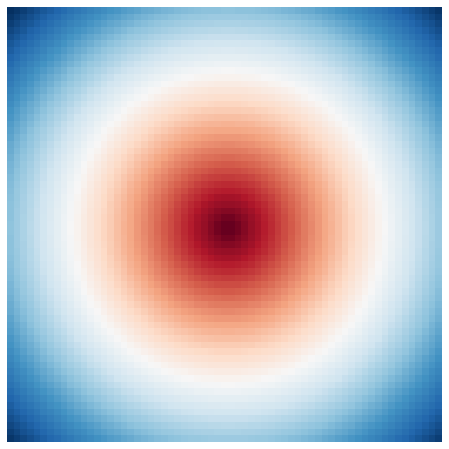

In [16]:
mc = get_dmap(csdf)
show_dmap(mc)

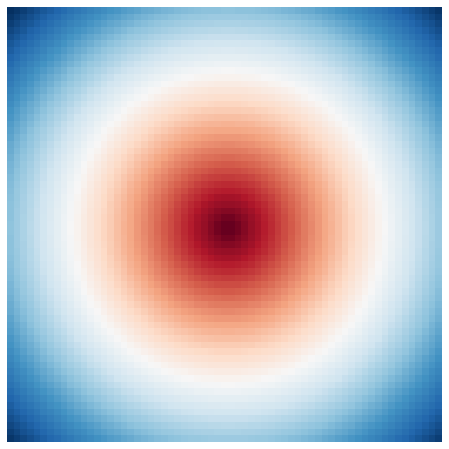

In [99]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mc, cmap='RdBu')

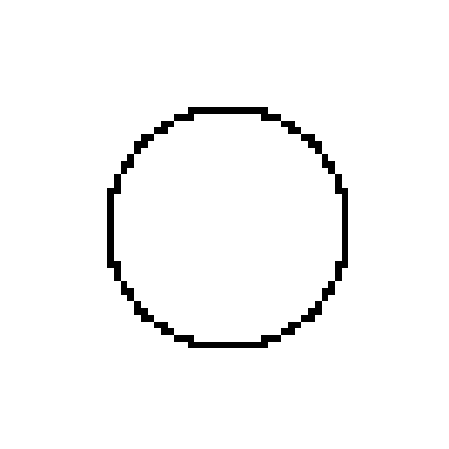

In [102]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mc)<0.07,cmap='Greys')

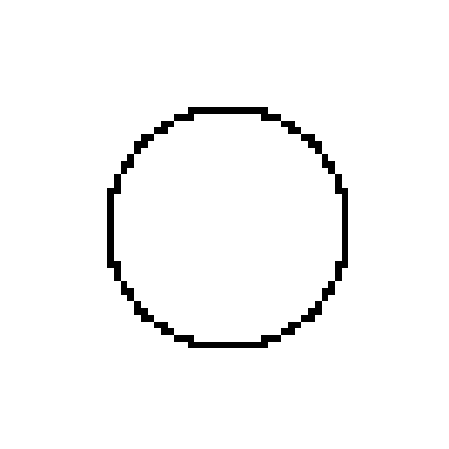

In [20]:
show_dmap(abs(mc)<0.07,cmap='Greys')

## OOP: Primitive Classes

In [25]:
class Rectangle(object):
    def __init__(self, px, py, w, h):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
    
    def get_distance(self, x, y):
        return max(abs(self.px-x) - self.w/2, abs(self.py-y) - self.h/2)

In [24]:
class Circle(object):
    def __init__(self, px, py, r):
        self.px = px
        self.py = py
        self.r  = r
    
    def get_distance(self, x, y):
        return math.sqrt((self.px-x)**2 + (self.py-y)**2) - self.r

## Boolean operations

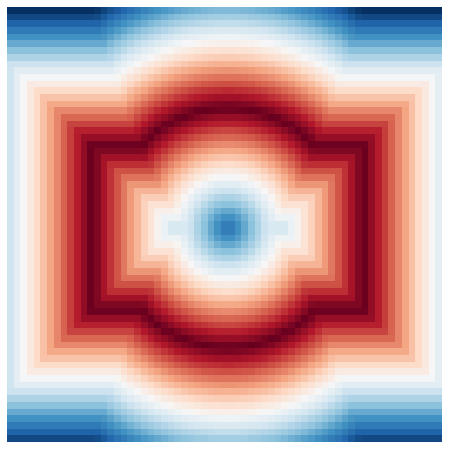

In [24]:
show_dmap(abs(np.minimum(mr,mc)))

### Union

$A\cup B$
```python
min(A, B)```

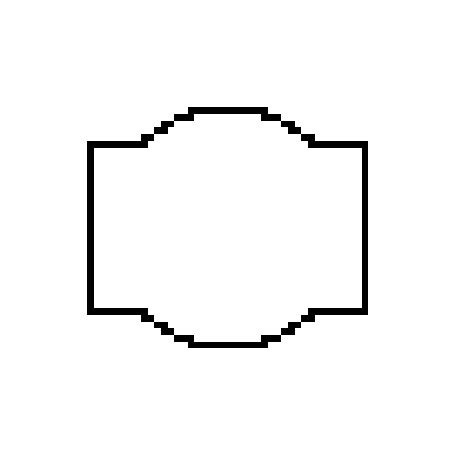

In [25]:
show_dmap(abs(np.minimum(mr,mc))<0.07,cmap='Greys')

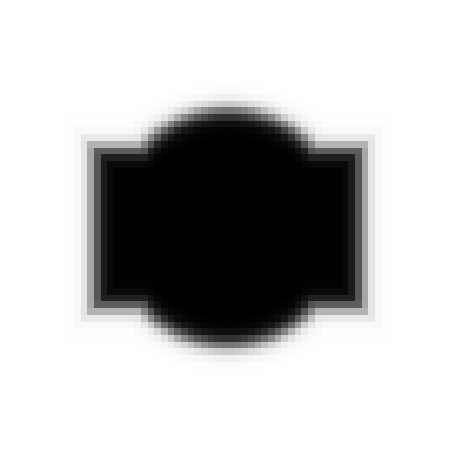

In [37]:
# aliasing
show_dmap(-np.tanh(np.minimum(mr,mc)*5), cmap='Greys')

### Intersection
$A\cap B$
```python
max(A, B)```

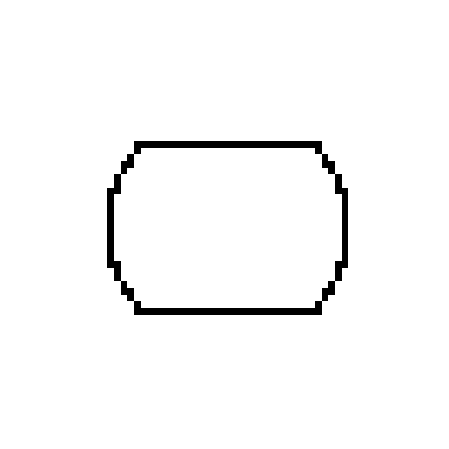

In [26]:
show_dmap(abs(np.maximum(mr,mc))<0.07,cmap='Greys')

### Subtraction
$A-B$
```python
max(A, -B)```

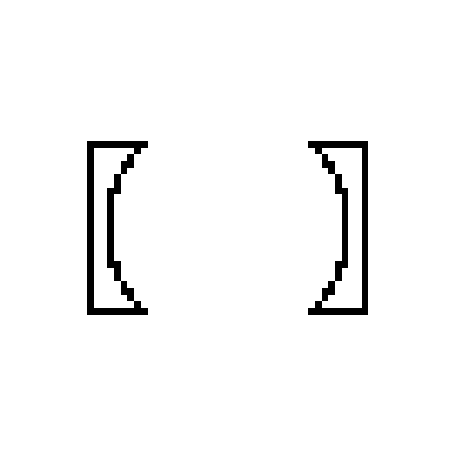

In [27]:
show_dmap(abs(np.maximum(mr,-mc))<0.07,cmap='Greys')

### Subtraction
$B-A$
```python
max(-A, B)```

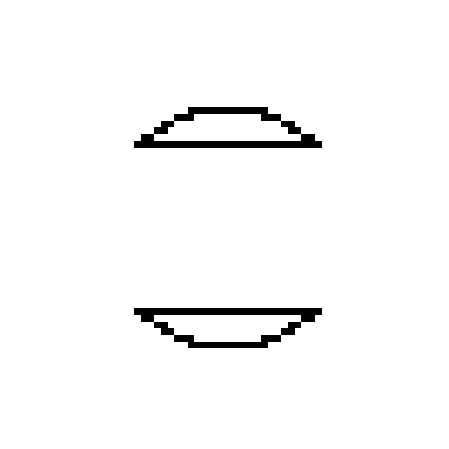

In [28]:
show_dmap(abs(np.maximum(-mr,mc))<0.07,cmap='Greys')

### Iso-Contour

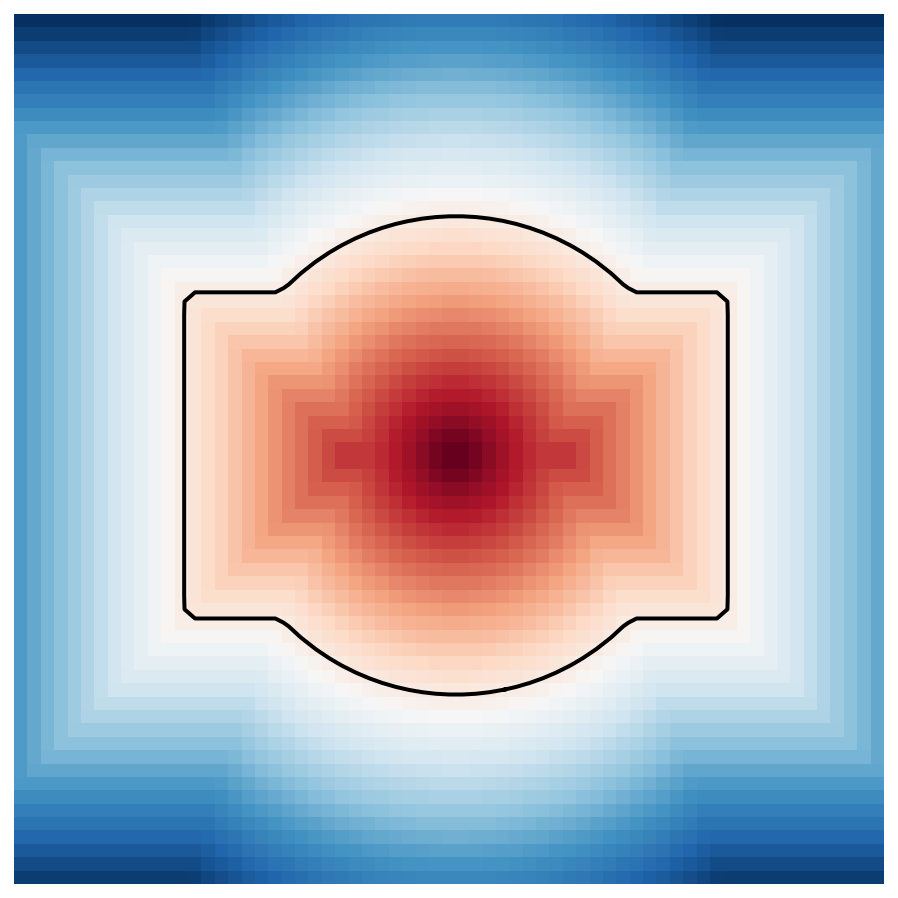

In [82]:
show_contours(np.minimum(mr,mc))

### Offset and Shell

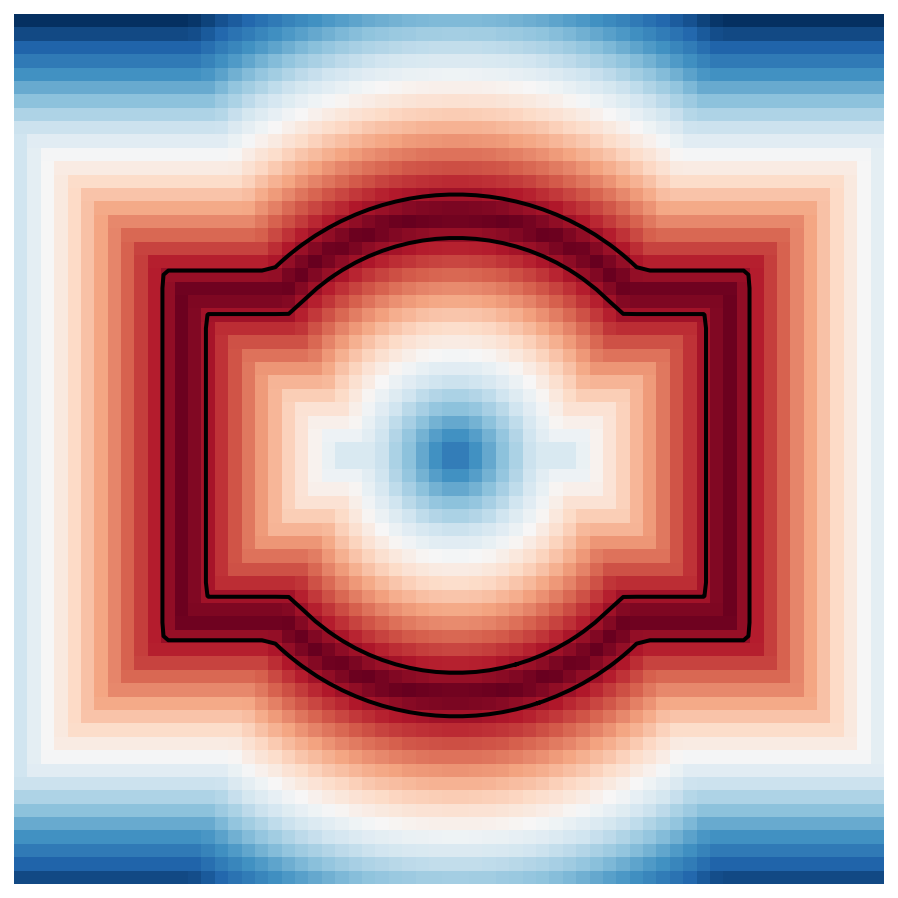

In [83]:
show_contours(abs(np.minimum(mr,mc))-0.2)

In [89]:
!ls images

Sketchpad-Apple.jpg                 rect_circ_bool.svg
blend                               screen
mario                               tumblr_lrjg0bOQ8W1qav3uso1_1280.png
part                                untitled.43.png
rect_circ_bool.pdf


## Blend shapes

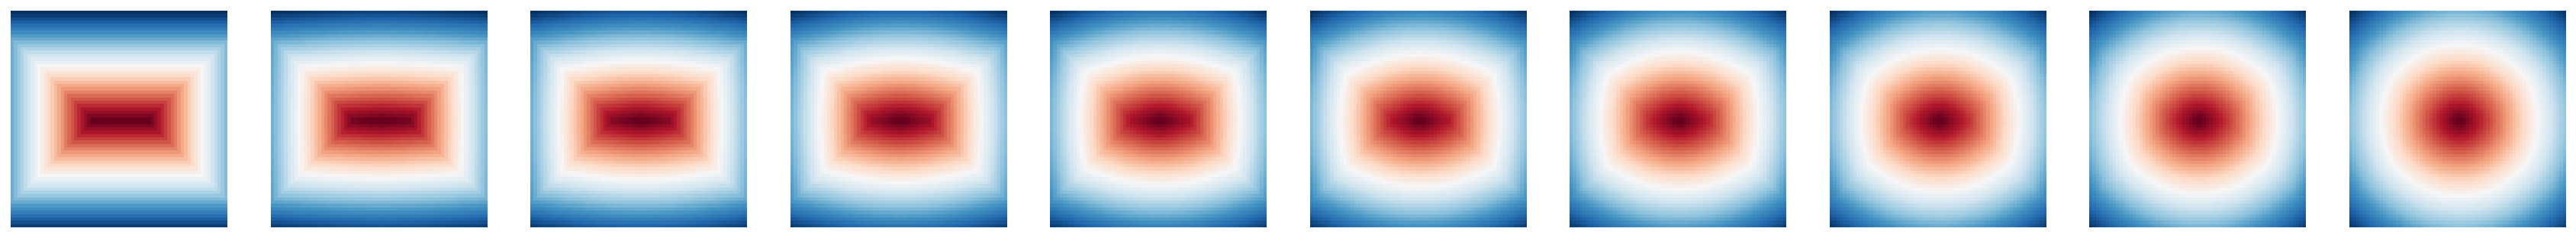

In [86]:
plt.figure(figsize=(30,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    f = i/10.
    plt.axis('off')
    plt.imshow((1-f)*mr+f*mc,cmap='RdBu')

## blending of 3D shapes

<table><tr>
    <td><img src="images/blend/box_sphere.gif"></img></td>
    <td><img src="images/blend/dodeca-capsule.gif"></img></td>
    <td><img src="images/blend/sphere-torus.gif"></img></td>
</tr></table>

## Boolean operations

Different situations possible:

- no intersection
- corner clip (4 lines and an arc)
- complex polygon (flip direction of hole)
- two polygons
- edge clip (3 lines and an arc)
- ...many more

<img src="images/rect_circ_bool.svg"></img>

## same format: distance object

In [101]:
class Union(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return min(d)

In [117]:
import random
cs = []
for i in range(10):
    c = Circle(random.random()*10,random.random()*10,1+random.random()*1.5)
    cs.append(c)
u = Union(cs)

In [134]:
mcs = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = u.get_distance(cx,cy)
        mcs[y,x] = d

### Bubbles

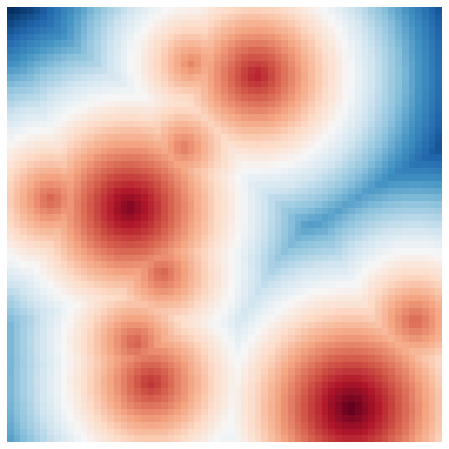

In [136]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mcs, cmap='RdBu')

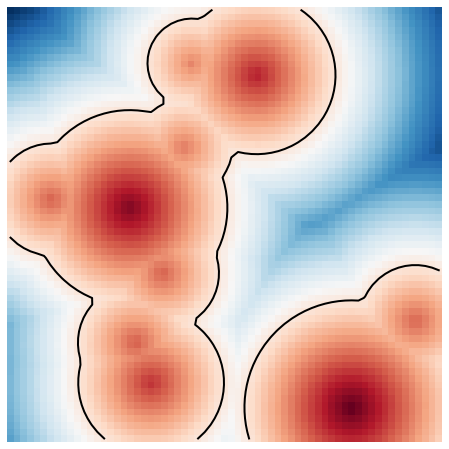

In [183]:
contours = measure.find_contours(mcs, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mcs,cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

In [142]:
n=65

## Transformation Matrices

Instead of transforming the object, we inverse transform the query point.

In [2]:
from IPython.lib.display import VimeoVideo
VimeoVideo('358530638', width=800, height=600)

In [4]:
def transform(p, m):
    x = sum([p[i]*m[0][i] for i in range(3)])
    y = sum([p[i]*m[1][i] for i in range(3)])
    return (x,y)

In [6]:
p = (4,2,1)
m = [(0.5000, -0.8660, -1.5981),
     (0.8660,  0.5000,  3.2321)]
transform(p,m)

(-1.3301, 7.6961)

### Transformations

identity matrix | rotation $\alpha$ | translation $(tx, ty)$ | scale $(tx, ty)$ | shear $k$/$m$
:-- | :-- | :-- | :-- | :--
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} | \begin{bmatrix} cos(\alpha) & sin(\alpha) & 0 \\ -sin(\alpha) & cos(\alpha) & 0 \\ 0 & 0 & 1 \end{bmatrix} | \begin{bmatrix} 1 & 0 & tx \\ 0 & 1 & ty \\ 0 & 0 & 1 \end{bmatrix} | \begin{bmatrix} sx & 0 & 0 \\ 0 & sy & 0 \\ 0 & 0 & 1 \end{bmatrix} | \begin{bmatrix} 1 & k & 0 \\ m & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}

### Vector $\times$ Matrix Multiplication

\begin{equation}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \cdot
\begin{bmatrix} a & b & c \\ d & e & f \\ 0 & 0 & 1 \end{bmatrix} =
\begin{bmatrix} a \cdot x + b \cdot y + c \cdot 1 \\ d \cdot x + e \cdot y + f \cdot 1 \\ 0 \cdot x + 0 \cdot y + 1 \cdot 1 \end{bmatrix} =
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix}
\end{equation}


### Lattice

In [75]:
class Lattice(object):
    def __init__(self, wl=1.):
        self.wl = wl
    
    def get_distance(self, x, y):
        d = math.sin(x*math.pi/self.wl)+math.sin(y*math.pi/self.wl)
        return abs(d)-0.4

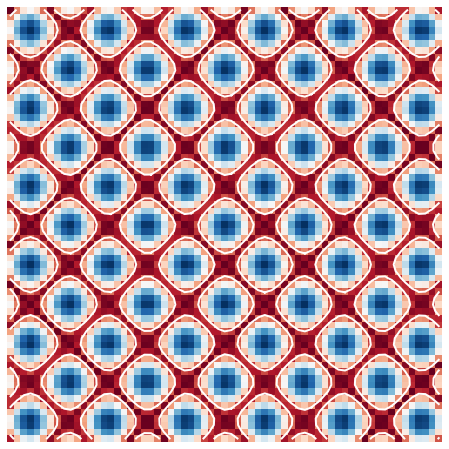

In [182]:
l = Lattice(0.9)
ml = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = l.get_distance(cx,cy)
        ml[y,x] = d
        
contours = measure.find_contours(ml, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(ml, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')

In [68]:
class Intersection(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return max(d)

In [69]:
class Shell(object):
    def __init__(self, obj=None, d=1.):
        self.obj = obj
        self.d = d
    
    def get_distance(self, x, y):
        return abs(self.obj.get_distance(x,y))-self.d

In [82]:
class Subtraction(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def get_distance(self, x, y):
        da = self.a.get_distance(x,y)
        db = self.b.get_distacne(x,y)
        return max(da, -db)

In [148]:
ints = Intersection([l,u])
csh = Shell(u,0.2)
u2 = Union([ints,csh])

compl = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = u2.get_distance(cx,cy)
        compl[y,x] = d

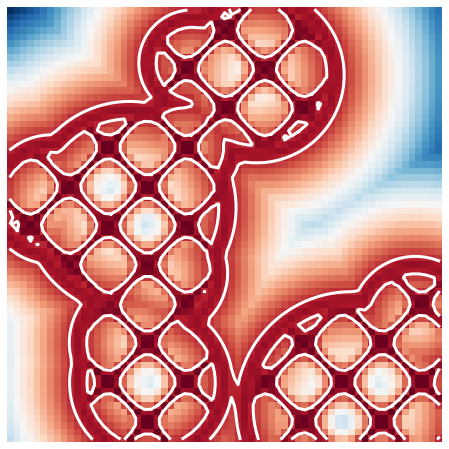

In [180]:
contours = measure.find_contours(compl, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(compl, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=3, c='w')

### Overlay

In [165]:
class Overlay(object):
    def __init__(self, a, b, f):
        self.a = a
        self.b = b
        self.f = f
    
    def get_distance(self, x, y):
        da = self.a.get_distance(x,y)
        db = self.b.get_distance(x,y)
        return da + self.f*db

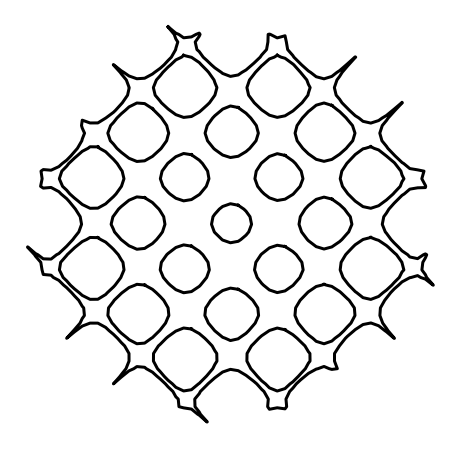

In [193]:
ov = Overlay(l,Circle(5,5,3),0.3)
om = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = ov.get_distance(cx,cy)
        om[y,x] = d
contours = measure.find_contours(om, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
#plt.imshow(-om, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=3, c='k')

## Rounded Rectangle

In [8]:
class RRectangle(object):
    def __init__(self, px, py, w, h, r):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
        self.r  = r
    
    def get_distance(self, x, y):
        dx = abs(self.px - x) - (self.w / 2.0 - self.r)
        dy = abs(self.py - y) - (self.h / 2.0 - self.r)
        inside = max(dx, dy) - self.r
        dx = max(dx, 0)
        dy = max(dy, 0)
        if inside + self.r < 0:
            return inside
        else:
            corner = math.sqrt(dx**2 + dy**2) - self.r
            return corner

In [15]:
n=64
rr = RRectangle(5,5,8,6,1.5)
rm = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = rr.get_distance(cx,cy)
        rm[y,x] = d

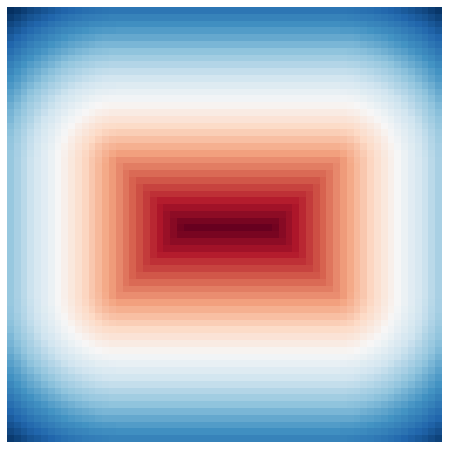

In [22]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(rm, cmap='RdBu')

## Line

In [109]:
class Line(object):
    def __init__(self, p1, p2):
        self.p1 = np.array(p1+[0])
        self.p2 = np.array(p2+[0])
        self.t = 0.5
    
    def get_distance(self, x, y):
        p3 = np.array([x,y,0])
        d = np.linalg.norm(np.cross(self.p2-self.p1, self.p1-p3))/np.linalg.norm(self.p2-self.p1)
        return d-self.t/2

In [114]:
lines = []
for i in range(10):
    a = [random.random()*10 for _ in range(2)]
    b = [random.random()*10 for _ in range(2)]
    l = Line(a,b)
    lines.append(l)
ul = Union(lines)

In [115]:
n = 65
ml = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = ul.get_distance(cx,cy)
        ml[y,x] = d

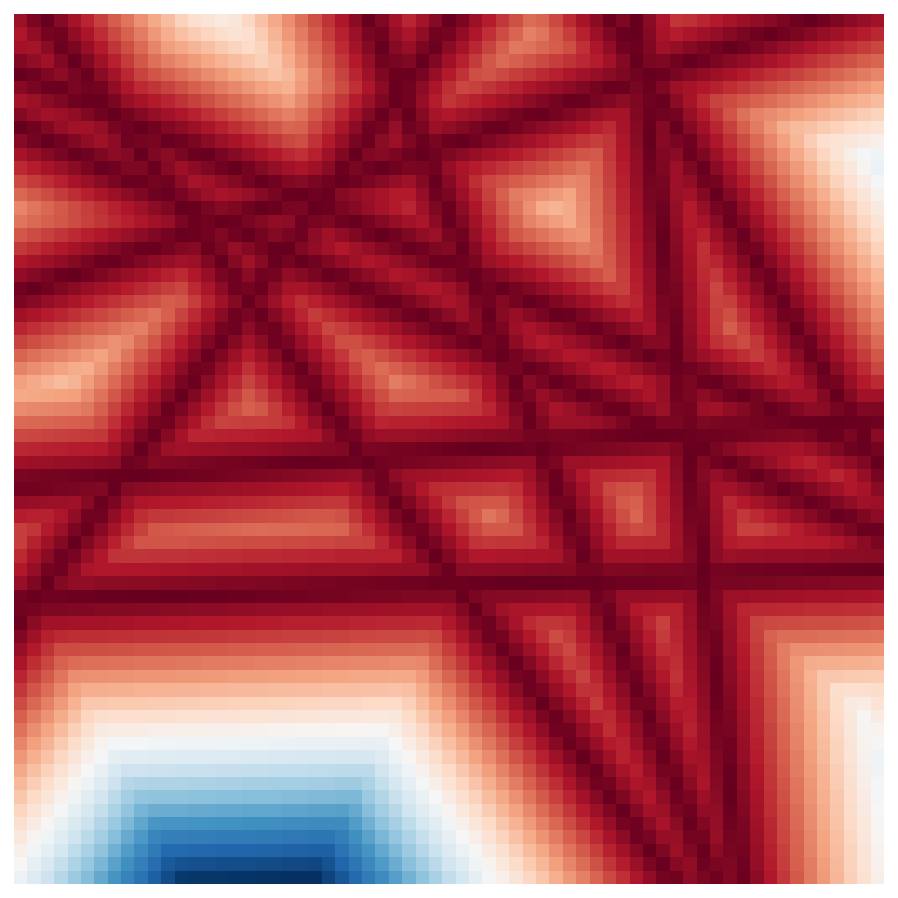

In [116]:
show_dmap(ml)

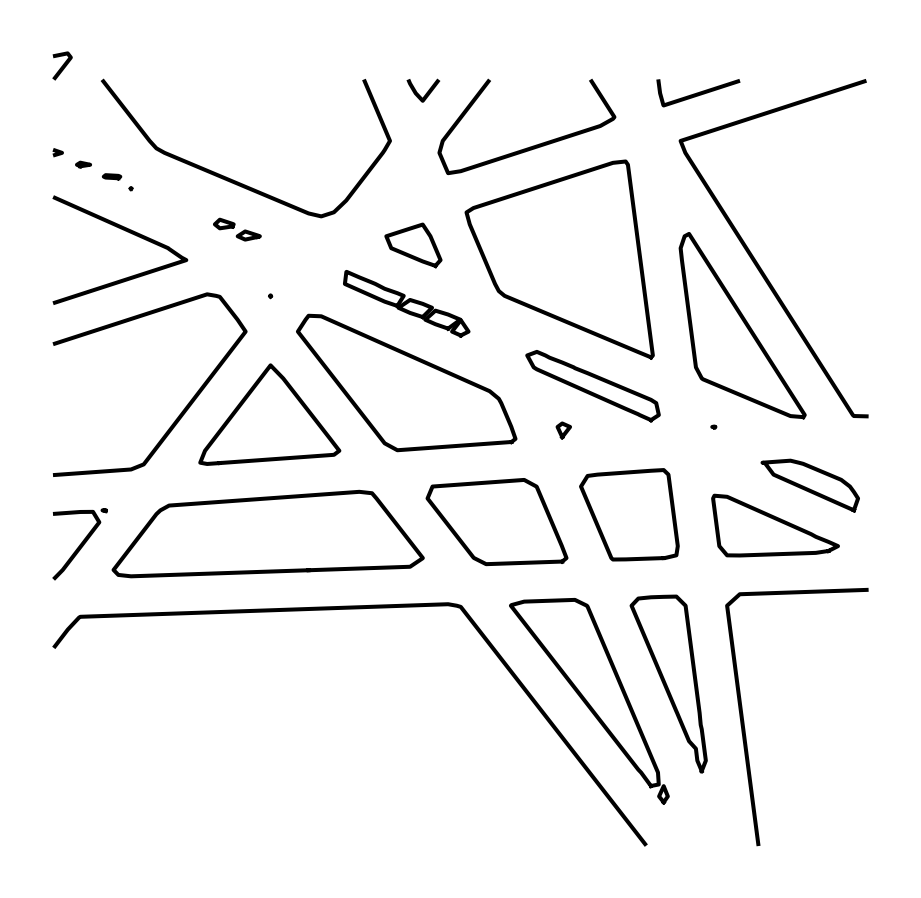

In [123]:
show_contours(ml,i=False)

In [96]:
p1 = np.array([-1,-1,0])
p2 = np.array([1,1,0])
p3 = np.random.random((500,3))*8-4
p3[:,2] = 0
d = [np.linalg.norm(np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1) for p in p3]
#d = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1)

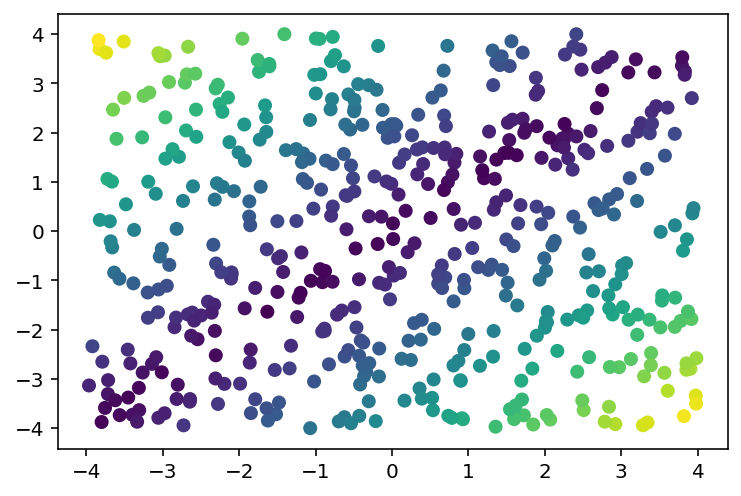

In [97]:
plt.scatter(p3[:,0],p3[:,1], c=d)